# SOAL UAS

1.	Buatlah tutorial  analisa k-mean clustering clustering data abstrak ekonomi-manajemen pada  pta.trunojoyo.ac.id

2.	Lakukan analisa topik modelling menggunakan metode Latent Semantic Analysis pada data abstrak  ekonomi-manajemen di pta.trunojoyo.ac.id 

Ket: 
1.	Dikerjakan jupyter notebook  dan didokumentasikan menggunakan Jupyterbook

2.	Hasil di hosting di github ( link url repository github anda  di upload di schoology )

3.	tutorial no 1:

a.	Penjelasan tentang crawling dan proses melakukan crawling pada pta.trunojoyo.ac.id data abtrak ekonomi-manajemen

b.	Pre Proses data dan  Tf-idf dari data abtrak ekonomi-manajemen pta.trunojoyo.ac.id 

c.	Analisa  k-mean clustering pada abtrak ekonomi-manajemen pta.trunojoyo.ac.id


## Crawling data

Pada tugas sebelumnya, saya melakukan crawling data dari website https://pta.trunojoyo.ac.id/.

Cara crawling:

1. Menambahkan link website

2. Membaca formula dari kontennya

3. Jalankan code di bawah menggunakan terminal pada Visual Studio Code dengan perintah "scrapy runspider namafile.py"

4. Kemudian saya mengekstrak data hasil crawling menjadi .csv. dengan perintah "scrapy runspider namafile.py -o namafile.csv"

In [ ]:
import scrapy


class CrawlingPTA(scrapy.Spider):
    name = 'crawlingpta'
    start_urls = ['https://pta.trunojoyo.ac.id/c_search/byprod/7',
                'https://pta.trunojoyo.ac.id/c_search/byprod/7/2',
                'https://pta.trunojoyo.ac.id/c_search/byprod/7/3',
                'https://pta.trunojoyo.ac.id/c_search/byprod/7/4',
                'https://pta.trunojoyo.ac.id/c_search/byprod/7/5',
                'https://pta.trunojoyo.ac.id/c_search/byprod/7/6',
                'https://pta.trunojoyo.ac.id/c_search/byprod/7/7',
                'https://pta.trunojoyo.ac.id/c_search/byprod/7/8',
                'https://pta.trunojoyo.ac.id/c_search/byprod/7/9',
                'https://pta.trunojoyo.ac.id/c_search/byprod/7/10',
                'https://pta.trunojoyo.ac.id/c_search/byprod/7/11']

    def parse(self,response):
        for item in response.css('a.gray.button'):
            try:
                page_link = item.css('a.gray.button').attrib['href']
                if page_link is not None:
                    yield response.follow(page_link, self.parse_page)
            except:
                yield 'not found'
    
    def parse_page(self, response):
        for item in response.css('ul.items.list_style'):
            try:
                yield {
                    'abstract' : item.xpath('//*[@id="content_journal"]/ul/li/div[4]/div[2]/p/text()').get(),
                }
            except:
                yield {
                    'abstract' : 'not found'
                }

## Preprocessing data

Setelah melakukan crawling data lakukan proses preprocessing

### Install packages / module

In [1]:
import pandas as pd
import numpy as np
import string
import re #regrex libray
import nltk
import swifter
import Sastrawi
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.tokenize.punkt import PunktSentenceTokenizer
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

[nltk_data] Downloading package punkt to C:\Users\Windows
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Windows
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load dataset

In [2]:
import pandas as pd

MY_DATA = pd.read_csv("dataset.csv")

MY_DATA.head(54)

,Dokumen,abstrak
0,1,Tujuan penelitian ini adalah untuk mengidentif...
1,2,Tujuan penelitian ini adalah untuk mengetahui ...
2,3,Tujuan penelitian ini adalah mendeskripsikan i...
3,4,PLN merupakan Badan Usaha Milik Negara yang be...
4,5,Penelitian ini mengungkapkan beberapa rumusan ...
5,6,"Haryono Arifin, Pengaruh Perilaku Konsumen Ter..."
6,7,Hasil dari penelitian ini dari perhitungan Cre...
7,8,"Dharma Abidin Syah,Kesimpulan: (1) Terdapat pe..."
8,9,Tujuan penelitian ini adalah untuk mengidentif...
9,10,"Penelitian ini menggunakan metode kuantitatif,..."


### Case folding

In [3]:
MY_DATA['abstrak'] = MY_DATA['abstrak'].str.lower()

print('Case Folding Result:\n')
print(MY_DATA['abstrak'].head(54))
print('\n\n\n')

Case Folding Result:

0     tujuan penelitian ini adalah untuk mengidentif...
1     tujuan penelitian ini adalah untuk mengetahui ...
2     tujuan penelitian ini adalah mendeskripsikan i...
3     pln merupakan badan usaha milik negara yang be...
4     penelitian ini mengungkapkan beberapa rumusan ...
5     haryono arifin, pengaruh perilaku konsumen ter...
6     hasil dari penelitian ini dari perhitungan cre...
7     dharma abidin syah,kesimpulan: (1) terdapat pe...
8     tujuan penelitian ini adalah untuk mengidentif...
9     penelitian ini menggunakan metode kuantitatif,...
10    tujuan penelitian ini adalah untuk mengetahui ...
11    aplikasi nyata pemanfaatan teknologi informasi...
12    penelitian ini bertujuan untuk mengukur efekti...
13    ali rahbini, pengaruh harga dan kualitas pelay...
14    bauran eceran merupakan salah satu langkah pem...
15    tujuan penelitian ini adalah mengetahui pengar...
16    ulfiyatun mutohharoh, “analisis faktor-faktor ...
17    tujuan penelitian in

### Tokenizing

In [4]:
import string 
import re #regex library


# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

# ------ Tokenizing ---------

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
MY_DATA['abstrak'] = MY_DATA['abstrak'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

MY_DATA['abstrak'] = MY_DATA['abstrak'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

MY_DATA['abstrak'] = MY_DATA['abstrak'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

MY_DATA['abstrak'] = MY_DATA['abstrak'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

MY_DATA['abstrak'] = MY_DATA['abstrak'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

MY_DATA['abstrak'] = MY_DATA['abstrak'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

MY_DATA['abstrak_tokens'] = MY_DATA['abstrak'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(MY_DATA['abstrak_tokens'].head(54))
print('\n\n\n')

Tokenizing Result : 

0     [tujuan, penelitian, ini, adalah, untuk, mengi...
1     [tujuan, penelitian, ini, adalah, untuk, menge...
2     [tujuan, penelitian, ini, adalah, mendeskripsi...
3     [pln, merupakan, badan, usaha, milik, negara, ...
4     [penelitian, ini, mengungkapkan, beberapa, rum...
5     [haryono, arifin, pengaruh, perilaku, konsumen...
6     [hasil, dari, penelitian, ini, dari, perhitung...
7     [dharma, abidin, syahkesimpulan, terdapat, pen...
8     [tujuan, penelitian, ini, adalah, untuk, mengi...
9     [penelitian, ini, menggunakan, metode, kuantit...
10    [tujuan, penelitian, ini, adalah, untuk, menge...
11    [aplikasi, nyata, pemanfaatan, teknologi, info...
12    [penelitian, ini, bertujuan, untuk, mengukur, ...
13    [ali, rahbini, pengaruh, harga, dan, kualitas,...
14    [bauran, eceran, merupakan, salah, satu, langk...
15    [tujuan, penelitian, ini, adalah, mengetahui, ...
16    [ulfiyatun, mutohharoh, analisis, faktorfaktor...
17    [tujuan, penelitian,

### Menghitung Frekuensi Distribusi Token

In [5]:
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

MY_DATA['abstrak_tokens_fdist'] = MY_DATA['abstrak_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(MY_DATA['abstrak_tokens_fdist'].head(54).apply(lambda x : x.most_common()))

Frequency Tokens : 

0     [(menggunakan, 6), (persepsi, 6), (internet, 5...
1     [(yang, 14), (variabel, 12), (dan, 8), (peneli...
2     [(inovasi, 5), (keunggulan, 5), (bersaing, 5),...
3     [(yang, 7), (pln, 5), (penelitian, 5), (kerja,...
4     [(biaya, 6), (kualitas, 6), (pada, 6), (ini, 5...
5     [(konsumen, 6), (pembelian, 6), (yang, 6), (ke...
6     [(sebesar, 9), (tahun, 7), (dari, 4), (pada, 4...
7     [(variabel, 16), (tipe, 10), (prestasi, 10), (...
8     [(konsumen, 7), (variabel, 7), (yang, 6), (kep...
9     [(variabel, 10), (yang, 8), (ini, 7), (hipotes...
10    [(dimensi, 8), (penelitian, 5), (dan, 5), (ini...
11    [(dan, 8), (akademik, 8), (portal, 5), (kepuas...
12    [(yang, 6), (pengaruh, 6), (langsung, 6), (tid...
13    [(terhadap, 7), (harga, 6), (dan, 6), (berbela...
14    [(dan, 9), (eceran, 8), (yang, 8), (harga, 8),...
15    [(penelitian, 6), (dan, 5), (variabel, 5), (in...
16    [(yang, 16), (produk, 10), (online, 9), (fakto...
17    [(jembatan, 5), (sura

## Filtering (Stopword Removal)

In [6]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("dataset.csv", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

MY_DATA['abstrak_tokens_WSW'] = MY_DATA['abstrak_tokens'].apply(stopwords_removal) 


print(MY_DATA['abstrak_tokens_WSW'].head(54))

0     [tujuan, penelitian, mengidentifikasi, variabe...
1     [tujuan, penelitian, pengaruh, variabel, retai...
2     [tujuan, penelitian, mendeskripsikan, inovasi,...
3     [pln, badan, usaha, milik, negara, bergerak, b...
4     [penelitian, rumusan, pelaporan, biaya, kualit...
5     [haryono, arifin, pengaruh, perilaku, konsumen...
6     [hasil, penelitian, perhitungan, credit, risk,...
7     [dharma, abidin, syahkesimpulan, pengaruh, sig...
8     [tujuan, penelitian, mengidentifikasi, variabe...
9     [penelitian, metode, kuantitatif, menekankan, ...
10    [tujuan, penelitian, persepsi, brand, associat...
11    [aplikasi, nyata, pemanfaatan, teknologi, info...
12    [penelitian, bertujuan, mengukur, efektivitas,...
13    [ali, rahbini, pengaruh, harga, kualitas, pela...
14    [bauran, eceran, salah, langkah, pemasaran, ke...
15    [tujuan, penelitian, pengaruh, celebrity, endo...
16    [ulfiyatun, mutohharoh, analisis, faktorfaktor...
17    [tujuan, penelitian, menganalisis, atribut

### Normalization

In [7]:
normalizad_word = pd.read_csv("dataset.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

MY_DATA['abstrak_normalized'] = MY_DATA['abstrak_tokens_WSW'].apply(normalized_term)

MY_DATA['abstrak_normalized'].head(54)

0     [tujuan, penelitian, mengidentifikasi, variabe...
1     [tujuan, penelitian, pengaruh, variabel, retai...
2     [tujuan, penelitian, mendeskripsikan, inovasi,...
3     [pln, badan, usaha, milik, negara, bergerak, b...
4     [penelitian, rumusan, pelaporan, biaya, kualit...
5     [haryono, arifin, pengaruh, perilaku, konsumen...
6     [hasil, penelitian, perhitungan, credit, risk,...
7     [dharma, abidin, syahkesimpulan, pengaruh, sig...
8     [tujuan, penelitian, mengidentifikasi, variabe...
9     [penelitian, metode, kuantitatif, menekankan, ...
10    [tujuan, penelitian, persepsi, brand, associat...
11    [aplikasi, nyata, pemanfaatan, teknologi, info...
12    [penelitian, bertujuan, mengukur, efektivitas,...
13    [ali, rahbini, pengaruh, harga, kualitas, pela...
14    [bauran, eceran, salah, langkah, pemasaran, ke...
15    [tujuan, penelitian, pengaruh, celebrity, endo...
16    [ulfiyatun, mutohharoh, analisis, faktorfaktor...
17    [tujuan, penelitian, menganalisis, atribut

### Stemmer

In [8]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
import pandas as pd 
import numpy as np


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in MY_DATA['abstrak_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

MY_DATA['abstrak_tokens_stemmed'] = MY_DATA['abstrak_normalized'].swifter.apply(get_stemmed_term)
print(MY_DATA['abstrak_tokens_stemmed'])

1168
------------------------
tujuan : tuju
penelitian : teliti
mengidentifikasi : identifikasi
variabelvariabel : variabelvariabel
mempengaruhi : pengaruh
minat : minat
ulang : ulang
nasabah : nasabah
bri : bri
layanan : layan
internet : internet
banking : banking
parsial : parsial
simultan : simultan
metode : metode
kuantitatif : kuantitatif
dimana : mana
populasi : populasi
kota : kota
bangkalan : bangkal
diperoleh : oleh
sampel : sampel
responden : responden
diambil : ambil
teknik : teknik
purposive : purposive
sampling : sampling
analisis : analisis
regresi : regresi
linier : linier
berganda : ganda
hasil : hasil
pengaruh : pengaruh
signifikan : signifikan
variabel : variabel
bebas : bebas
persepsi : persepsi
manfaat : manfaat
kemudahan : mudah
keamanan : aman
ketersediaan : sedia
fitur : fitur
berpengaruh : pengaruh
positif : positif
kecuali : kecuali
kemudahanxdkata : kemudahanxdkata
kunci : kunci
retailing : retailing
mix : mix
lokasi : lokasi
merchandise : merchandise
harga : 

evans : evans
foster : foster
suasana : suasana
indah : indah
respondenteknik : respondenteknik
kepustakaan : pustaka
respondenuntuk : respondenuntuk
klasiksedangkan : klasiksedangkan
bangkalannamun : bangkalannamun
bangakalanvariabel : bangakalanvariabel
pemebelian : beli
kuci : kuci
toko : toko
celebrity : celebrity
endorser : endorser
iwan : iwan
fals : fals
top : top
coffee : coffee
masyarakat : masyarakat
sumur : sumur
kembang : kembang
kelurahan : lurah
pejagan : pejagan
survey : survey
menngunakan : menngunakan
lapang : lapang
erangkat : erangkat
for : for
windows : windows
trustworthiness : trustworthiness
expertise : expertise
attractiveness : attractiveness
respect : respect
similarity : similarity
minet : minet
disimpulkan : simpul
miant : miant
ulfiyatun : ulfiyatun
mutohharoh : mutohharoh
faktorfaktor : faktorfaktor
menentukan : tentu
preferensi : preferensi
belanja : belanja
fashion : fashion
mahasiwa : mahasiwa
fakultas : fakultas
ekonomi : ekonomi
journal : journal
of :

altman : altman
peringatan : ingat
tandatanda : tandatanda
diskriptif : diskriptif
peneliti : teliti
zscore : zscore
kritis : kritis
sehat : sehat
intention : intention
this : this
is : is
know : know
influence : influence
location : location
ofis : ofis
effort : effort
and : and
quality : quality
xterhadap : xterhadap
purchasing : purchasing
also : also
whichsuch : whichsuch
having : having
bigger : bigger
ppengaruh : ppengaruh
at : at
home : home
eat : eat
soto : soto
glorious : glorious
asih : asih
use : use
quantitative : quantitative
method : method
with : with
approach : approach
population : population
entireall : entireall
doingconducting : doingconducting
the : the
used : used
hence : hence
get : get
responder : responder
collecting : collecting
into : into
library : library
result : result
mention : mention
tied : tied
that : that
while : while
from : from
prove : prove
free : free
consisting : consisting
by : by
or : or
together : together
can : can
be : be
concluded : concl

Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

0     [tuju, teliti, identifikasi, variabelvariabel,...
1     [tuju, teliti, pengaruh, variabel, retailing, ...
2     [tuju, teliti, deskripsi, inovasi, unggul, sai...
3     [pln, badan, usaha, milik, negara, gerak, bida...
4     [teliti, rumus, lapor, biaya, kualitas, minima...
5     [haryono, arifin, pengaruh, perilaku, konsumen...
6     [hasil, teliti, hitung, credit, risk, ratio, t...
7     [dharma, abidin, syahkesimpulan, pengaruh, sig...
8     [tuju, teliti, identifikasi, variabelvariabel,...
9     [teliti, metode, kuantitatif, tekan, uji, hipo...
10    [tuju, teliti, persepsi, brand, association, l...
11    [aplikasi, nyata, manfaat, teknologi, informas...
12    [teliti, tuju, ukur, efektivitas, iklan, consu...
13    [ali, rahbini, pengaruh, harga, kualitas, laya...
14    [baur, ecer, salah, langkah, pasar, hasil, usa...
15    [tuju, teliti, pengaruh, celebrity, endorser, ...
16    [ulfiyatun, mutohharoh, analisis, faktorfaktor...
17    [tuju, teliti, analis, atribut, kualitas, 

## Save prepocessing data

In [9]:
MY_DATA["abstrak_tokens_stemmed"].to_csv("Text_Preprocessing_PTA.csv")

## Prepare data

In [10]:
import pandas as pd 
import numpy as np

MY_DATA = pd.read_csv("Text_Preprocessing_PTA.csv", usecols=["abstrak_tokens_stemmed"])
MY_DATA.columns = ["abstrak"]
MY_DATA.head(54)

,abstrak
0,"['tuju', 'teliti', 'identifikasi', 'variabelva..."
1,"['tuju', 'teliti', 'pengaruh', 'variabel', 're..."
2,"['tuju', 'teliti', 'deskripsi', 'inovasi', 'un..."
3,"['pln', 'badan', 'usaha', 'milik', 'negara', '..."
4,"['teliti', 'rumus', 'lapor', 'biaya', 'kualita..."
5,"['haryono', 'arifin', 'pengaruh', 'perilaku', ..."
6,"['hasil', 'teliti', 'hitung', 'credit', 'risk'..."
7,"['dharma', 'abidin', 'syahkesimpulan', 'pengar..."
8,"['tuju', 'teliti', 'identifikasi', 'variabelva..."
9,"['teliti', 'metode', 'kuantitatif', 'tekan', '..."


## Term frekuensi

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

a=len(document)
document = MY_DATA['abstrak']

# Create a Vectorizer Object
vectorizer = CountVectorizer()

vectorizer.fit(document)

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the Document
vector = vectorizer.transform(document)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

Vocabulary:  {'tuju': 976, 'teliti': 934, 'identifikasi': 323, 'variabelvariabel': 1009, 'pengaruh': 670, 'minat': 571, 'ulang': 990, 'nasabah': 602, 'bri': 124, 'layan': 499, 'internet': 355, 'banking': 87, 'parsial': 652, 'simultan': 861, 'metode': 568, 'kuantitatif': 468, 'mana': 534, 'populasi': 700, 'kota': 456, 'bangkal': 82, 'oleh': 627, 'sampel': 814, 'responden': 786, 'ambil': 36, 'teknik': 929, 'purposive': 748, 'sampling': 816, 'analisis': 40, 'regresi': 773, 'linier': 509, 'ganda': 278, 'hasil': 306, 'signifikan': 855, 'variabel': 1008, 'bebas': 97, 'persepsi': 688, 'manfaat': 536, 'mudah': 593, 'aman': 33, 'sedia': 827, 'fitur': 264, 'positif': 705, 'kecuali': 400, 'kemudahanxdkata': 409, 'kunci': 475, 'retailing': 794, 'mix': 579, 'lokasi': 514, 'merchandise': 565, 'harga': 304, 'atmosfer': 70, 'gerai': 285, 'promosi': 733, 'putus': 755, 'beli': 102, 'konsumen': 449, 'retailimg': 793, 'idola': 324, 'mart': 543, 'kwanyar': 480, 'dekat': 172, 'landas': 490, 'filsafat': 259,

In [12]:
a = vectorizer.get_feature_names()

## TF-ID

In [13]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
tf = tfidf.fit_transform(vectorizer.fit_transform(document)).toarray()

In [14]:
dfb = pd.DataFrame(data=tf,index=list(range(1, len(tf[:,1])+1, )),columns=[a])
dfb

,abidin,accidental,acer,action,adaro,adira,adjusted,administrasi,adnya,agro,...,wildansemsi,windows,wispandonosems,with,xl,xterhadap,yakin,yamaha,yustina,zscore
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060077,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
8,0.044949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,0.000000,0.073956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [15]:
dfb.to_excel('./TF-IDF.xlsx')

## Finding Optimal Clusters

Pengelompokan adalah operasi tanpa pengawasan, dan KMeans mengharuskan kami menentukan jumlah klaster. Salah satu pendekatan sederhana adalah memplot SSE untuk berbagai ukuran cluster. Kami mencari "siku" di mana SSE mulai turun. MiniBatchKMeans memperkenalkan beberapa kebisingan jadi saya menaikkan ukuran batch dan init lebih tinggi. Sayangnya implementasi Kmeans reguler terlalu lambat. Anda akan melihat keadaan acak yang berbeda akan menghasilkan grafik yang berbeda. Disini saya memilih 14 cluster.

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


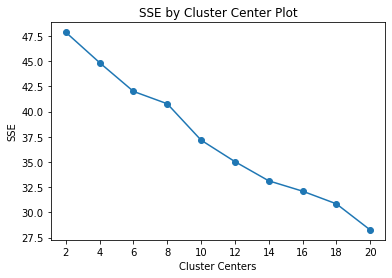

In [52]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import MiniBatchKMeans
def find_optimal_clusters(MY_DATA, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=100, batch_size=100, random_state=20).fit(MY_DATA).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(tf, 20)